## Preparació

In [43]:
# Paquets

import pandas as pd
import geopandas as gpd
import zipfile
import urllib.request
import os

In [44]:
# Paràmetres

# Directori de treball
WORK_DIR = os.path.abspath(os.getcwd())

# Directoris
if not os.path.exists('downloads'):
    os.makedirs('downloads')
if not os.path.exists('tmp'):
    os.makedirs('tmp')
if not os.path.exists('map'):
    os.makedirs('map')
if not os.path.exists('datasets'):
    os.makedirs('datasets')

# Enllaços de descàrrega
URL_CARRIL_BICI = 'https://opendata-ajuntament.barcelona.cat/data/dataset/e3497ea4-0bae-4093-94a7-119df50a8a74/resource/21967f18-724b-48df-a4e2-62242325ba5a/download'
URL_CARRIL_BICI_ALTRES_MUNICIPIS = 'https://opendata-ajuntament.barcelona.cat/data/dataset/bcbfe860-7838-468c-b78e-f15d3b9e01f8/resource/bc6e6f9c-41c2-4cc0-b4b9-7c4163525110/download'
URL_CARRIL_BICI_CONSTRUCCIO = 'https://opendata-ajuntament.barcelona.cat/data/dataset/edee68e3-5ff1-43d0-b556-12c5d8eb019e/resource/3535ae40-e365-42be-adcf-3a5301948e0b/download'
URL_VIES_CICLABLES = 'https://opendata-ajuntament.barcelona.cat/data/dataset/ae147deb-1b95-4b25-aa3a-b57067f000bc/resource/5b355f42-1f0c-4e47-ba01-109d875dd508/download'
URL_ZONES30_CARRERS = 'https://opendata-ajuntament.barcelona.cat/data/dataset/2258826a-67ba-4429-a500-30472ff6251a/resource/42718881-fb85-4748-aa58-0436a8e87c3f/download'
URL_ZONES30_POLIGONS = 'https://opendata-ajuntament.barcelona.cat/data/dataset/2258826a-67ba-4429-a500-30472ff6251a/resource/d4763337-2300-412c-9955-05d2c5fc8a47/download'
URL_CARRERS_PACIFICATS = 'https://opendata-ajuntament.barcelona.cat/data/dataset/335bceee-7988-4899-b2fa-accba6a917c7/resource/d9f9d46c-d55c-419c-93f6-02b3d26beb00/download'
URL_CORREDORS_BICI = 'https://opendata-ajuntament.barcelona.cat/data/dataset/af083278-6873-4a3c-b3d5-68860cc769af/resource/4ee104ac-945e-44c8-8459-b499c9113340/download'
URL_RONDA_VERDA = 'https://opendata-ajuntament.barcelona.cat/data/dataset/18990935-6b67-49d4-9e92-2171d439ee59/resource/545cfc32-9048-4c2b-8283-44c7a9cfb25a/download'

URL_PACIFICATS_DBF = 'https://opendata-ajuntament.barcelona.cat/data/dataset/335bceee-7988-4899-b2fa-accba6a917c7/resource/e9a8ff54-9427-4fd1-bbc8-0a97cd63252f/download'
URL_PACIFICATS_PRJ = 'https://opendata-ajuntament.barcelona.cat/data/dataset/335bceee-7988-4899-b2fa-accba6a917c7/resource/61f44bfa-fec3-42f4-a600-84a90ad8c48d/download'
URL_PACIFICATS_SHX = 'https://opendata-ajuntament.barcelona.cat/data/dataset/335bceee-7988-4899-b2fa-accba6a917c7/resource/c8859aa4-a817-4aba-8bf3-23d9b9b791d6/download'
URL_PACIFICATS_SHP = 'https://opendata-ajuntament.barcelona.cat/data/dataset/335bceee-7988-4899-b2fa-accba6a917c7/resource/803f281a-fe15-4463-843f-36d7b37c76a6/download'


In [45]:
# Funcions

def get_data(url, filename):
    """Descarrega i descomprimeix les dades a la carpeta 'datasets'."""
    try:
        urllib.request.urlretrieve(url, WORK_DIR + '/downloads/' + filename + '.zip')
        zf = zipfile.ZipFile('downloads/' + filename + ".zip")
        zf.extractall(path = 'datasets/' + filename)
        print(filename + " descarregat correctament.")
    except:
        print("Problema descarregant: " + filename)
        
def save_data(gdf, filename):
    """Guarda un geodataframe en format SHP, el comprimeix i el desa a la carpeta 'map'."""
    gdf.to_file('tmp/' + filename + '.shp')
    zf = zipfile.ZipFile('map/' + filename + ".zip", "w", zipfile.ZIP_DEFLATED)
    zf.write('tmp/' + filename + ".dbf")
    zf.write('tmp/' + filename + ".shp")
    zf.write('tmp/' + filename + ".prj")
    zf.write('tmp/' + filename + ".shx")
    zf.write('tmp/' + filename + ".cpg")
    zf.close()
    print(filename + ' guardat correctament.')

In [46]:
# Captura de dades

get_data(URL_CARRIL_BICI, 'CARRIL_BICI')
get_data(URL_CARRIL_BICI_ALTRES_MUNICIPIS, 'CARRIL_BICI_ALTRES_MUNICIPIS')
get_data(URL_CARRIL_BICI_CONSTRUCCIO, 'CARRIL_BICI_CONSTRUCCIO')
get_data(URL_RONDA_VERDA, 'RONDA_VERDA')
get_data(URL_VIES_CICLABLES, 'VIES_CICLABLES')
get_data(URL_ZONES30_CARRERS, 'ZONES30_CARRERS')
get_data(URL_ZONES30_POLIGONS, 'ZONES30_POLIGONS')
get_data(URL_CARRERS_PACIFICATS, 'CARRERS_PACIFICATS')
get_data(URL_CORREDORS_BICI, 'CORREDORS_BICI')

CARRIL_BICI descarregat correctament.
CARRIL_BICI_ALTRES_MUNICIPIS descarregat correctament.
CARRIL_BICI_CONSTRUCCIO descarregat correctament.
RONDA_VERDA descarregat correctament.
VIES_CICLABLES descarregat correctament.
ZONES30_CARRERS descarregat correctament.
ZONES30_POLIGONS descarregat correctament.
Problema descarregant: CARRERS_PACIFICATS
CORREDORS_BICI descarregat correctament.


In [47]:
# Districtes de Barcelona

districtes = gpd.read_file('datasets/DISTRICTES/DISTRICTES.shp')

districtes.crs

<Projected CRS: EPSG:25831>
Name: ETRS89 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 0°E to 6°E and ETRS89 by country
- bounds: (0.0, 37.0, 6.01, 82.41)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Carrils bici

* Bidireccional en vorera - Permet la circulació de bicicletes en tots dos sentits de la circulació.  Com a exemples d’aquest tipus de carril, tenim l’avinguda Diagonal, des de Francesc Macià al Palau de Pedralbes, o la Gran Via de les Corts Catalanes des de plaça d'Espanya a l'avinguda del Carrilet.
* Unidireccional en vorera - Permet la circulació en un únic sentit. És el que trobem a les tercianes de la Gran Via de les Corts Catalanes, entre la plaça d’Espanya i el carrer d’Aribau, o entre els carrers de Pau Claris i la Marina; i a les tercianes de l'avinguda Diagonal, entre el passeig de Gràcia i Sicília.
* Bidireccional en calçada - Permet la circulació de bicicletes en els dos sentits de la marxa. Normalment se situen a l'esquerra de la via en el sentit de la circulació dels altres vehicles (carrers de Calàbria, Marquès de Sentmenat, Urgell, Sicília, Provença, Teodor Llorente, etcètera). D'aquesta manera, el ciclista que circula en sentit contrari al trànsit rodat va més protegit. Aquest tipus de carril també pot estar situat al mig de la via, com per exemple al passeig de Sant Joan o a l’avinguda del Paral·lel.
* Unidireccional en calçada - Pot ser en el mateix sentit de la circulació (com les de l’avinguda Diagonal, la plaça de Francesc Macià, el passeig de Gràcia o els carrers Diputació i el Consell de Cent), o en sentit contrari, emprat especialment en carrers bici (30) per permetre la circulació de bicicletes en sentit contrari al propi de la via. És el cas de la carretera de la Bordeta o el carrer de la Jota.

In [48]:
# Carrils bici de Barcelona

# Lectura de dades
dades = gpd.read_file('datasets/CARRIL_BICI/CARRIL_BICI.shp')\
                     .to_crs(districtes.crs)

# Divisió per districtes
carril_bici = gpd.clip(dades, districtes.iloc[0].geometry)
carril_bici['districte'] = districtes.iloc[0].districte

for i in range(1, len(districtes)):
    tmp = gpd.clip(dades, districtes.iloc[i].geometry)
    tmp['districte'] = districtes.iloc[i].districte
    carril_bici = carril_bici.append(tmp, ignore_index=True)
    
# Creació i selecció d'atributs
carril_bici['longitud_km'] = carril_bici.length / 1000
carril_bici['TOOLTIP'] = carril_bici['TOOLTIP'].apply(lambda x: x[12:].split(' ',1))
carril_bici['carrer'] = carril_bici['TOOLTIP'].apply(lambda x: x[1])
carril_bici['sentit'] = carril_bici['TOOLTIP'].apply(lambda x: x[0])

carril_bici.drop(columns=['CODI_CAPA','CODI_SUBCA','TOOLTIP'], inplace=True)


carril_bici.head(3)

,ID,geometry,districte,longitud_km,carrer,sentit
0,GL385918,"LINESTRING (431740.496 4581621.167, 431730.787...",Ciutat Vella,0.350060,pg Isabel II,unidireccional
1,GL385919,"LINESTRING (431905.153 4581877.796, 431742.206...",Ciutat Vella,0.303950,av Marques Argentera,bidireccional
2,GL386975,"LINESTRING (430848.948 4582223.397, 430862.281...",Ciutat Vella,0.027979,Pau Claris,unidireccional


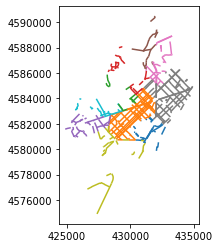

In [49]:
carril_bici.plot(column='districte')

In [50]:
# Carrils bici d'altres municipis

# Lectura de dades
carril_bici_altres = gpd.read_file('datasets/CARRIL_BICI_ALTRES_MUNICIPIS/CARRIL_BICI_ALTRES_MUNICIPIS.shp')\
                        .to_crs(districtes.crs)

# Creació i selecció d'atributs
carril_bici_altres['tipus'] = 'Carril bici (altres municipis)'
carril_bici_altres['longitud_km'] = carril_bici_altres.length / 1000
carril_bici_altres['carrer'] = carril_bici_altres['TOOLTIP'].apply(lambda x: x[29:])
carril_bici_altres['sentit'] = ''
carril_bici_altres.drop(columns=['CODI_CAPA','CODI_SUBCA', 'TOOLTIP'], inplace=True)

# Unió dades
#carril_bici = carril_bici.append(carril_bici_altres, ignore_index=True)

carril_bici_altres.head(3)

,ID,geometry,tipus,longitud_km,carrer,sentit
0,GL385847,"LINESTRING (425738.483 4575492.044, 425716.295...",Carril bici (altres municipis),3.169390,El Prat 1,
1,GL385817,"LINESTRING (435172.426 4585026.889, 434294.111...",Carril bici (altres municipis),2.003901,Sant Ramón de Penyafort,
2,GL385729,"LINESTRING (424165.971 4574543.752, 424170.360...",Carril bici (altres municipis),0.858088,Aeroport 6,


In [51]:
# Carril bici en construcció

# Lectura de dades
dades = gpd.read_file('datasets/CARRIL_BICI_CONSTRUCCIO/CARRIL_BICI_CONSTRUCCIO.shp')\
                 .to_crs(districtes.crs)

# Divisió per districtes
carril_bici_construccio = gpd.clip(dades, districtes.iloc[0].geometry)
carril_bici_construccio['districte'] = districtes.iloc[0].districte

for i in range(1,len(districtes)):
    tmp = gpd.clip(dades, districtes.iloc[i].geometry)
    tmp['districte'] = districtes.iloc[i].districte
    carril_bici_construccio = carril_bici_construccio.append(tmp, ignore_index=True)

# Creació i selecció d'atributs
carril_bici_construccio['longitud_km'] = carril_bici_construccio.length / 1000
carril_bici_construccio['carrer'] = carril_bici_construccio['TOOLTIP'].apply(lambda x: x[27:])
carril_bici_construccio['sentit'] = ''
carril_bici_construccio.drop(columns=['CODI_CAPA','CODI_SUBCA', 'TOOLTIP'], inplace=True)

# Unió dades
#carril_bici = carril_bici.append(carril_bici_construccio, ignore_index=True)

carril_bici_construccio.head(3)

,ID,geometry,districte,longitud_km,carrer,sentit
0,GL414349,"LINESTRING (431745.146 4584153.507, 431128.347...",Eixample,4.418490,Carrer Aragó,
1,GL414349,"LINESTRING (428587.417 4581064.643, 428584.266...",Sants-Montjuïc,0.004401,Carrer Aragó,
2,GL414352,"LINESTRING (427638.164 4579590.467, 427663.891...",Sants-Montjuïc,1.766703,pg Zona Franca - sentit mar,


## Vies ciclables

* Zones de vianants amb plataforma única (carrer 10 i 20) - Aquestes zones de prioritat invertida són àrees o carrers on les condicions de circulació de vehicles queden restringides a favor de la circulació de vianants. En aquestes zones, les bicicletes, els patins i els patinets gaudeixen de prioritat sobre la resta de vehicles, però no sobre els vianants, i poden circular en tots dos sentits de la via.
* Carrer Bici (carrer 30) - Són carrers de trànsit pacificat en els quals es promou la circulació de ciclistes, ja que el tràfic d'automòbils té limitada la seva velocitat a 30 km/h. En aquests carrers, les bicicletes han de circular en el sentit de la circulació de la via i tenen prioritat sobre la circulació de la resta de vehicles, però no sobre els vianants.


In [52]:
# Vies ciclables

# Lectura de dades
dades = gpd.read_file('datasets/VIES_CICLABLES/VIES_CICLABLES.shp')\
                    .to_crs(districtes.crs)

# Divisió per districtes
vies_ciclables = gpd.clip(dades, districtes.iloc[0].geometry)
vies_ciclables['districte'] = districtes.iloc[0].districte

for i in range(1,len(districtes)):
    tmp = gpd.clip(dades, districtes.iloc[i].geometry)
    tmp['districte'] = districtes.iloc[i].districte
    vies_ciclables = vies_ciclables.append(tmp, ignore_index=True)

# Atributs
vies_ciclables['longitud_km'] = vies_ciclables.length / 1000
#vies_ciclables['carrer'] = vies_ciclables['TOOLTIP'].apply(lambda x: x[14:])
vies_ciclables.drop(columns=['CODI_CAPA','CODI_SUBCA','TOOLTIP'], inplace=True)

vies_ciclables.head(3)

,ID,geometry,districte,longitud_km
0,GL386536,"LINESTRING (430669.332 4581329.749, 430773.283...",Ciutat Vella,0.187031
1,GL386537,"LINESTRING (430830.145 4581264.891, 430761.733...",Ciutat Vella,0.122225
2,GL386538,"LINESTRING (430719.086 4581351.073, 430743.075...",Ciutat Vella,0.076665


In [53]:
# Zona 30 POLIGONS

# Lectura de dades
zona30_poligons = gpd.read_file('datasets/ZONES30_POLIGONS/2020_3T_ZONES30_POLIGONS.shp')\
                     .to_crs(districtes.crs)

zona30_poligons.drop(columns=['CODI_CAPA','CODI_SUBCA','TOOLTIP','mes','any','trimestre','_timestamp'], inplace=True)

zona30_poligons.head()

,ID,geometry
0,GL78053,"POLYGON ((427262.867 4580799.762, 427271.318 4..."
1,GL78054,"POLYGON ((428344.817 4584817.552, 428203.523 4..."
2,GL78055,"POLYGON ((431286.220 4586870.857, 431286.677 4..."
3,GL78056,"POLYGON ((429071.025 4583231.806, 428888.815 4..."
4,GL78057,"POLYGON ((427201.568 4581284.481, 427186.642 4..."


In [54]:
# Zona 30 CARRERS

# Lectura de dades
dades = gpd.read_file('datasets/ZONES30_CARRERS/ZONES30_CARRERS.shp')\
             .to_crs(districtes.crs)

# Divisió per districtes
zona30 = gpd.clip(dades, districtes.iloc[0].geometry)
zona30['districte'] = districtes.iloc[0].districte

for i in range(1,len(districtes)):
    tmp = gpd.clip(dades, districtes.iloc[i].geometry)
    tmp['districte'] = districtes.iloc[i].districte
    zona30 = zona30.append(tmp, ignore_index=True)
    
zona30['tipus'] = 'Zona 30'
zona30['longitud_km'] = zona30.length / 1000
zona30.drop(columns=['CODI_CAPA','CODI_SUBCA','TOOLTIP'], inplace=True)

# Unió dades
#vies_ciclables = vies_ciclables.append(zona30, ignore_index=True)

zona30.head(2)

,ID,geometry,districte,tipus,longitud_km
0,GL77621,"LINESTRING (430668.643 4581475.478, 430675.463...",Ciutat Vella,Zona 30,0.062353
1,GL77622,"LINESTRING (430708.384 4581529.114, 430700.532...",Ciutat Vella,Zona 30,0.046778


In [55]:
# Corredors bici

# Lectura de dades
dades = gpd.read_file('datasets/CORREDORS_BICI/CORREDORS_BICI.shp')\
               .to_crs(districtes.crs)

# Districte
corredors = gpd.clip(dades, districtes.iloc[0].geometry)
corredors['districte'] = districtes.iloc[0].districte

for i in range(1,len(districtes)):
    tmp = gpd.clip(dades, districtes.iloc[i].geometry)
    tmp['districte'] = districtes.iloc[i].districte
    corredors = corredors.append(tmp, ignore_index=True)

# Atributs
corredors['tipus'] = 'Corredor bici'
corredors['longitud_km'] = corredors.length / 1000
corredors.drop(columns=['CODI_CAPA','CODI_SUBCA','TOOLTIP'], inplace=True)

# Unió dades
#vies_ciclables = vies_ciclables.append(corredors, ignore_index=True)

corredors.head()

,ID,geometry,districte,tipus,longitud_km
0,GL414096,"LINESTRING (430842.109 4582216.832, 430860.629...",Ciutat Vella,Corredor bici,0.026214
1,GL414195,"LINESTRING (428780.552 4580888.193, 428770.556...",Eixample,Corredor bici,0.014876
2,GL414196,"LINESTRING (428871.119 4580974.447, 429078.991...",Eixample,Corredor bici,0.320414
3,GL414101,"LINESTRING (429412.589 4583012.214, 429416.980...",Eixample,Corredor bici,0.010789
4,GL414102,"LINESTRING (429441.244 4583010.321, 429434.448...",Eixample,Corredor bici,0.011279


In [56]:
# Carrers pacificats

# Lectura dades
pacificats = gpd.read_file('datasets/CARRERS_PACIFICATS/CARRERS_PACIFICATS.shp')\
                .to_crs(districtes.crs)

# Districte
pacificats = gpd.clip(dades, districtes.iloc[0].geometry)
pacificats['districte'] = districtes.iloc[0].districte

for i in range(1,len(districtes)):
    tmp = gpd.clip(dades, districtes.iloc[i].geometry)
    tmp['districte'] = districtes.iloc[i].districte
    pacificats = pacificats.append(tmp, ignore_index=True)


# Atributs
pacificats['tipus'] = 'Carrer pacificat'
pacificats['longitud_km'] = pacificats.length / 1000
pacificats.drop(columns=['CODI_CAPA','CODI_SUBCA','TOOLTIP'], inplace=True)

# Unió dades
corredors = corredors.append(pacificats, ignore_index=True)

pacificats.head()

,ID,geometry,districte,tipus,longitud_km
0,GL414096,"LINESTRING (430842.109 4582216.832, 430860.629...",Ciutat Vella,Carrer pacificat,0.026214
1,GL414195,"LINESTRING (428780.552 4580888.193, 428770.556...",Eixample,Carrer pacificat,0.014876
2,GL414196,"LINESTRING (428871.119 4580974.447, 429078.991...",Eixample,Carrer pacificat,0.320414
3,GL414101,"LINESTRING (429412.589 4583012.214, 429416.980...",Eixample,Carrer pacificat,0.010789
4,GL414102,"LINESTRING (429441.244 4583010.321, 429434.448...",Eixample,Carrer pacificat,0.011279


## Ronda verda

In [57]:
# Ronda verda

# Lectura dades
ronda_verda = gpd.read_file('datasets/RONDA_VERDA/RONDA_VERDA.shp')\
                 .to_crs(districtes.crs)

# Atributs
ronda_verda['longitud_km'] = ronda_verda.length / 1000
ronda_verda['carrer'] = ronda_verda['TOOLTIP'].apply(lambda x: x.split(': ',1)[1])
ronda_verda.drop(columns=['CODI_CAPA','CODI_SUBCA', 'TOOLTIP'], inplace=True)

ronda_verda.head(2)

,ID,geometry,longitud_km,carrer
0,GL385629,"LINESTRING (430754.622 4589414.253, 430784.587...",6.305380,ronda verda 2
1,GL385569,"LINESTRING (431077.126 4580518.898, 431094.584...",4.058222,Ronda Colom - Moll Barceloneta - Pg. Marítim d...


## Exportació de dades

In [58]:
save_data(carril_bici, 'CARRIL_BICI')
save_data(carril_bici_construccio, 'CARRIL_BICI_CONSTRUCCIO')
save_data(carril_bici_altres, 'CARRIL_BICI_ALTRES')
save_data(vies_ciclables, 'VIES_CICLABLES')
save_data(zona30_poligons, 'ZONA30_POLIGONS')
save_data(zona30, 'ZONA30_CARRERS')
save_data(corredors, 'CORREDORS')
save_data(ronda_verda, 'RONDA_VERDA')

CARRIL_BICI guardat correctament.
CARRIL_BICI_CONSTRUCCIO guardat correctament.
CARRIL_BICI_ALTRES guardat correctament.
VIES_CICLABLES guardat correctament.
ZONA30_POLIGONS guardat correctament.
ZONA30_CARRERS guardat correctament.
CORREDORS guardat correctament.
RONDA_VERDA guardat correctament.
